# Super-Resolución

Este notebook será algo distinto, pues su motivación es introducir el uso de las distintas herramientas de IA y ML que hay disponibles vía API.

## Problema

Suponga que necesite crear una aplicación que aumente la resolución de una imagen. Por ejemplo, se tiene una imagen de 96x96 y se quiere escalar a 512x512. Si se hace por código, la imagen se verá mal porque los pixeles se verán más grandes. Ejemplo:

<img src="https://64.media.tumblr.com/936ea33a1035659fae79baee745605eb/fedf82c2a1e49ef0-3f/s128x128u_c1/27a2fdbdfc2f5ebd7d2123b71d5b1d0e4e0facd7.jpg" width="96" height="96">
<img src="https://64.media.tumblr.com/936ea33a1035659fae79baee745605eb/fedf82c2a1e49ef0-3f/s128x128u_c1/27a2fdbdfc2f5ebd7d2123b71d5b1d0e4e0facd7.jpg" width="512" height="512">

La idea es crear una aplicación que mejore la resolución a su vez que aumenta su tamaño

## Nota antes de empezar

En teoría puede correr todos estos modelos por su cuenta en un servidor propio. La mayoría de modelos tienen una API por código para ser implementados. No obstante, mantener un servidor dedicado es muy costoso, por lo que para pruebas de concepto y prototipos se suelen usar APIs "Serverless", las cuales son llamadas HTTP a un servidor.


En este caso se usa python porque es el lenguaje por defecto de los jupyter notebooks, pero puede usar cualquier lenguaje de programación e incluso la misma consola

## Helpers comunes para el problema

## Con la API de Hugging face

Hugging Face posee un [servicio de modelos](https://huggingface.co/docs/api-inference/en/index) bastante poderoso, que permite más de 150.000 modelos via peticiones HTTP.

**Nota importante**: El servicio no es gratis, pero las primeras peticiones lo son, por lo que es bastante útil para prototipos.

In [ ]:
# @title Introduce el API Token
# @markdown Aquí pones tu token de HuggingFace que generas acá https://huggingface.co/settings/tokens
API_TOKEN = "" #@param {type:"string"}


In [ ]:
import json
import requests

# Dependiendo de la tarea, el método puede ser algo distinto https://huggingface.co/docs/api-inference/en/detailed_parameters

def query_image(model: str, image_url: str):
  API_URL = f"https://api-inference.huggingface.co/models/{model}"
  headers = {"Authorization": f"Bearer {API_TOKEN}"}
  image = requests.get(image_url, stream=True)
  response = requests.request("POST", API_URL, headers=headers, data=image)
  return response

In [ ]:
# @title Datos de uso

model="radames/stable-diffusion-x4-upscaler-img2img" #@param {type:"string"}
image="https://64.media.tumblr.com/936ea33a1035659fae79baee745605eb/fedf82c2a1e49ef0-3f/s128x128u_c1/27a2fdbdfc2f5ebd7d2123b71d5b1d0e4e0facd7.jpg" #@param {type:"string"}


In [ ]:
response = query_image(model, image)

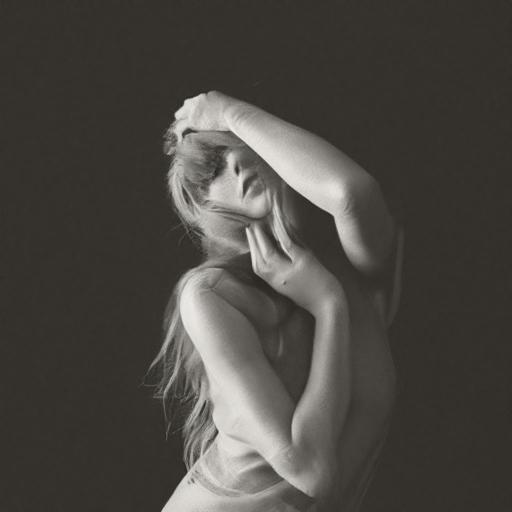

In [ ]:
# get the image from the response and show it

import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

# Get the image from the response
image_bytes = response.content

# Convert the image bytes to a PIL Image object
image = Image.open(BytesIO(image_bytes))

image

## Con Replicate

Replicate es uno de los proovedores de modelos de IA más importantes. Permite alquilar GPUs por uso para usar muchísimos modelos (siempre están los populares)

**Nota importante**: El servicio no es gratis, pero las primeras peticiones lo son, por lo que es bastante útil para prototipos

In [ ]:
!pip install replicate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00


In [ ]:
# @title Introduce el API Token
# @markdown Aquí pones tu token de HuggingFace que generas acá https://huggingface.co/settings/tokens
REPLICATE_API_TOKEN = "" #@param {type:"string"}

In [ ]:
# @title Datos de uso

model="jingyunliang/swinir:660d922d33153019e8c263a3bba265de882e7f4f70396546b6c9c8f9d47a021a" #@param {type:"string"}
image="https://64.media.tumblr.com/936ea33a1035659fae79baee745605eb/fedf82c2a1e49ef0-3f/s128x128u_c1/27a2fdbdfc2f5ebd7d2123b71d5b1d0e4e0facd7.jpg" #@param {type:"string"}

In [ ]:
import replicate

input = {
    "jpeg": 40,
    "noise": 15,
    "image": image
}

api = replicate.Client(api_token=REPLICATE_API_TOKEN)

output = api.run(
    model,
    input=input
)

from IPython.display import Image
Image(url=output)

# Otras alternativas

Hay otras alternativas, incluso mejores, que no se muestran en este caso porque no poseen un modelo de superescalado de imagenes, pero que es de gran relevancia mencionar: Azure ML Studio y Cloudflare AI Workers.

En el caso de Azure, la UCAB les da 100 USD de créditos que pueden usar para usar más de 1000 modelos de IA (con algunas restricciones como la imposibilidad de usar modelos de OpenAI).

Cloudflare por su parte, tiene un free tier gratuito de 10.000 neuronas que es más que suficiente para probar alrededor de una treintena de modelos.

Si se considera plataformas 100% pago o que requieren introducir una tarjeta de crédito/débito para empezar a usarlas estarían Vertex AI de Google Gloud Platform, los servicios AI de Amazon, entre otras plataformas.